In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df_=pd.read_csv('corona_hospitalization_ver_0016.csv', encoding = 'UTF-8', sep=",")        # from https://data.gov.il/dataset/covid-19/resource/e4bf0ab8-ec88-4f9b-8669-f2cc78273edd

In [84]:
df_.rename(columns = {
'תאריך': 'date',
'מאושפזים': 'hospitalized',
'אחוז נשים מאושפזות': 'hospitalized_female_pct',
'גיל ממוצע מאושפזים': 'hospitalized_age',
'סטיית תקן גיל מאושפזים': 'hospitalized_age_stddev',
'מונשמים': 'respiratory',
'אחוז נשים מונשמות': 'respiratory_female_pct',
'גיל ממוצע מונשמים': 'respiratory_age',
'סטיית תקן גיל מונשמים': 'respiratory_age_stddev',
'חולים קל': 'fair',
'אחוז נשים חולות קל': 'fair_female_pct',
'גיל ממוצע חולים קל': 'fair_age',
'סטיית תקן גיל חולים קל': 'fair_age_stddev',
'חולים בינוני': 'serious',
'אחוז נשים חולות בינוני': 'serious_female_pct',
'גיל ממוצע חולים בינוני': 'serious_age',
'סטיית תקן גיל חולים בינוני': 'serious_age_stddev',
'חולים קשה': 'critical',
'אחוז נשים חולות קשה': 'critical_female_pct',
'גיל ממוצע חולים קשה': 'critical_age',
'סטיית תקן גיל חולים קשה': 'critical_age_stddev',},
          inplace=True)


In [85]:
df_['date'] = pd.to_datetime(df_['date'])


In [88]:
df = df_.copy()
for c in ['respiratory', 'serious', 'critical']:
  print(c)
  df[c] = df[c].replace({'<15' : None}).astype(float)

respiratory
serious
critical


In [89]:
#df.set_index('date', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     114 non-null    datetime64[ns]
 1   hospitalized             114 non-null    int64         
 2   hospitalized_female_pct  114 non-null    float64       
 3   hospitalized_age         114 non-null    float64       
 4   hospitalized_age_stddev  114 non-null    float64       
 5   respiratory              104 non-null    float64       
 6   respiratory_female_pct   114 non-null    float64       
 7   respiratory_age          114 non-null    float64       
 8   respiratory_age_stddev   114 non-null    float64       
 9   fair                     114 non-null    int64         
 10  fair_female_pct          114 non-null    float64       
 11  fair_age                 114 non-null    float64       
 12  fair_age_stddev          114 non-nul

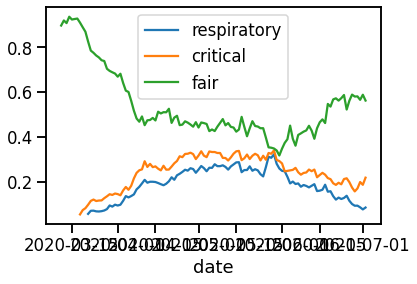

In [116]:
#nums = df[['date', 'hospitalized', 'respiratory', 'fair', 'serious', 'critical']]
nums = df[['date']].copy()
nums['respiratory'] = df['respiratory'] / df['hospitalized']
nums['critical'] = df['critical'] / df['hospitalized']
nums['fair'] = df['fair'] / df['hospitalized']
nums.set_index('date', inplace=True)

sns.set_context("talk")
sns.lineplot(data=nums, dashes=False)


In [121]:
# add positive tests
tests = pd.read_csv('first_time_tests.csv')
tests.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   test_date    114 non-null    object 
 1   marginal     47 non-null     float64
 2   neg          114 non-null    float64
 3   pos          112 non-null    float64
 4   reject       104 non-null    float64
 5   uncertain    16 non-null     float64
 6   wip          27 non-null     float64
 7   total_tests  114 non-null    float64
 8   pct_pos      112 non-null    float64
dtypes: float64(8), object(1)
memory usage: 8.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     114 non-null    datetime64[ns]
 1   hospitalized             114 non-null    int64         
 2   hospitalized_female_pct  114

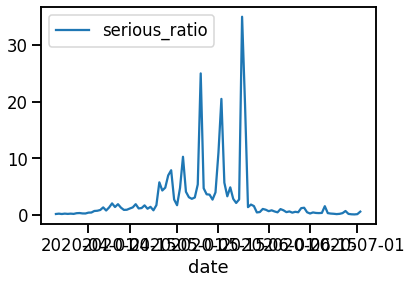

In [130]:
tests['test_date'] = pd.to_datetime(tests['test_date'])
m = pd.merge(df, tests, how='inner', left_on='date', right_on='test_date')
m.head()
nums = m[['date']].copy()
nums['serious_ratio'] = m['serious'] / m['pos']
nums.set_index('date', inplace=True)
sns.lineplot(data=nums, dashes=False)
nums.to_csv('foo.csv')